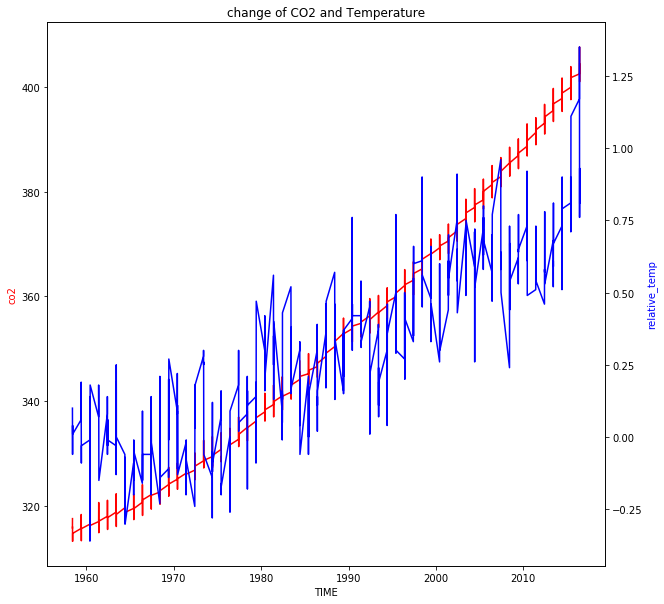

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("./climate_change.csv", 

                      sep=",", 

                      parse_dates=['date'], 

                      dayfirst=True, 

                      infer_datetime_format=True)


pd.to_datetime(data['date'])

fig,ax1 = plt.subplots()

ax1.plot(data['date'],data['co2'],color="red")
ax1.set_xlabel('TIME')
ax1.set_ylabel('co2',color="red")

ax2 = ax1.twinx()
ax2.plot(data['date'],data['relative_temp'],color="blue")
ax2.set_ylabel('relative_temp',color="blue")

plt.title("change of CO2 and Temperature")

plt.show()



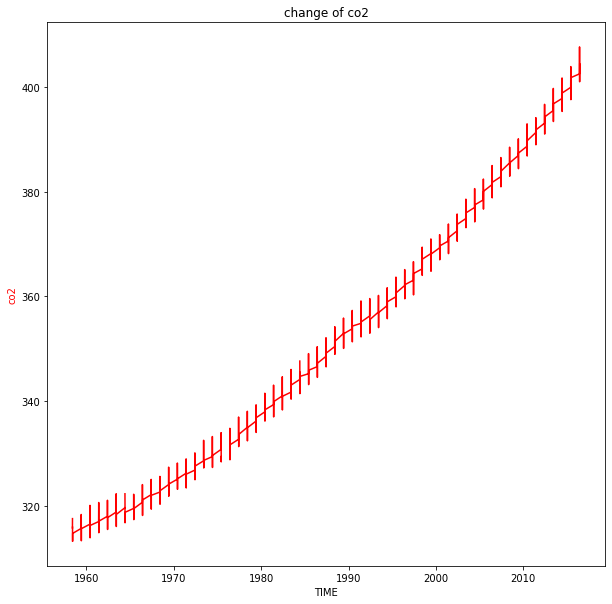

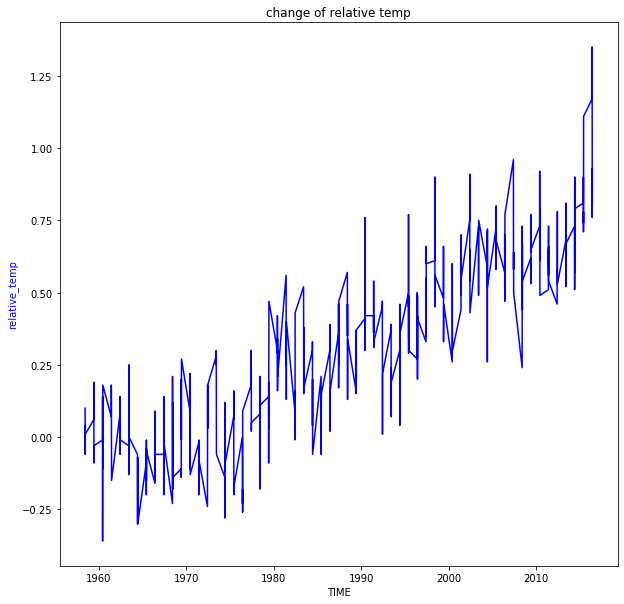

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("./climate_change.csv", 

                      sep=",", 

                      parse_dates=['date'], 

                      dayfirst=True, 

                      infer_datetime_format=True)

fig,ax1 = plt.subplots()

ax1.plot(data['date'],data['co2'],color="red")
ax1.set_xlabel('TIME')
ax1.set_ylabel('co2',color="red")
ax1.set_title("change of co2")

fig,ax2 = plt.subplots()
ax2.plot(data['date'],data['relative_temp'],color="blue")
ax2.set_ylabel('relative_temp',color="blue")
ax2.set_xlabel('TIME')
ax2.set_title("change of relative temp")

plt.show()



               co2  relative_temp
date                             
1958-06-03  315.71           0.10
1958-06-04  317.45           0.01
1958-06-05  317.50           0.08
1958-06-06     NaN          -0.05
1958-06-07  315.86           0.06
...            ...            ...
1967-06-08  320.92           0.02
1967-06-09  319.31          -0.04
1967-06-10  319.31           0.06
1967-06-11  320.72          -0.06
1967-06-12  321.96          -0.02

[118 rows x 2 columns]


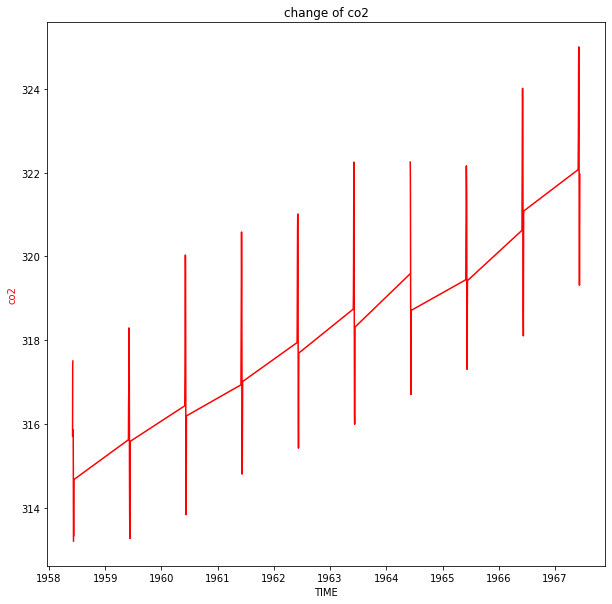

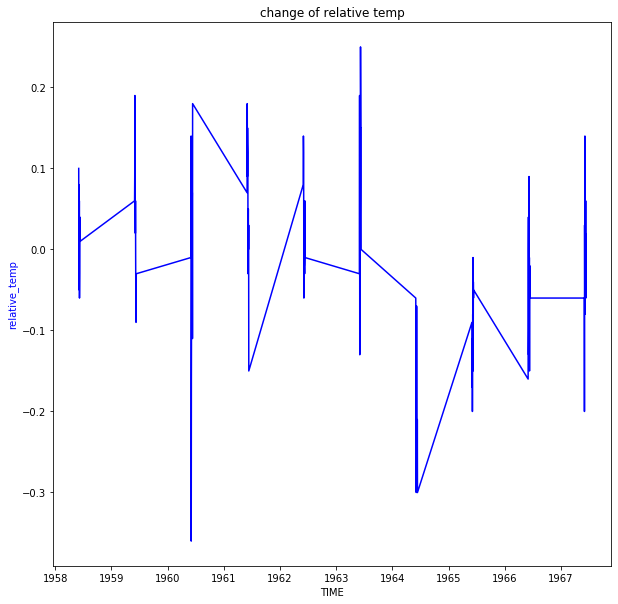

'\nco2와 relative temp는 밀접한 관련이 없으며, co2는 일정한 주기성을 가지고 증가하고 있으나,\nrelative temp는 불규칙적으로 변화한다. \n'

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

data = pd.read_csv("./climate_change.csv", 
                      sep=",", 
                      parse_dates=['date'],
                      index_col = ['date'],
                      dayfirst=True, 
                      infer_datetime_format=True)

sample = data["1958-03-06":"1968-03-07"]

fig,ax1 = plt.subplots()

ax1.plot(sample['co2'],color="red")
ax1.set_xlabel('TIME')
ax1.set_ylabel('co2',color="red")
ax1.set_title("change of co2")

fig,ax2 = plt.subplots()
ax2.plot(sample['relative_temp'],color="blue")
ax2.set_ylabel('relative_temp',color="blue")
ax2.set_xlabel('TIME')
ax2.set_title("change of relative temp")

plt.show()


# 추론할 수 있는 내용
"""
co2와 relative temp는 밀접한 관련이 없으며, co2는 일정한 주기성을 가지고 증가하고 있으나,
relative temp는 불규칙적으로 변화한다. 
"""


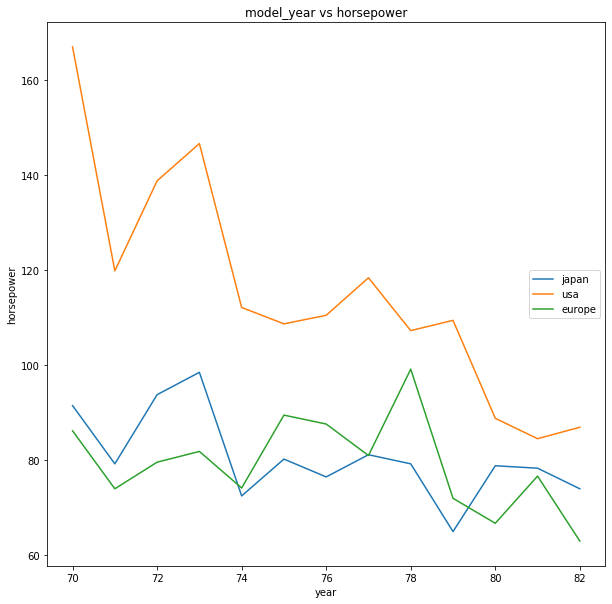

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

data = pd.read_csv("mpg.csv", 
                      sep=",", 
                      dayfirst=True, 
                      infer_datetime_format=True)

is_japan = data["origin"] == "japan"
is_usa = data["origin"] == "usa"
is_europe = data["origin"] == "europe" 

plt.plot(data["model_year"].drop_duplicates(), data[is_japan].groupby("model_year")["horsepower"].mean(),label="japan")
plt.plot(data["model_year"].drop_duplicates(), data[is_usa].groupby("model_year")["horsepower"].mean(),label="usa")
plt.plot(data["model_year"].drop_duplicates(), data[is_europe].groupby("model_year")["horsepower"].mean(),label="europe")

plt.xlabel('year')
plt.ylabel('horsepower')

plt.title("model_year vs horsepower")
plt.legend(loc="right")


plt.show()


"""
알 수 있는 점 :
저반적으로 마력이 감소하는 추세이다.
usa의 마력이 다른 국가들에 비해 높다.
"""




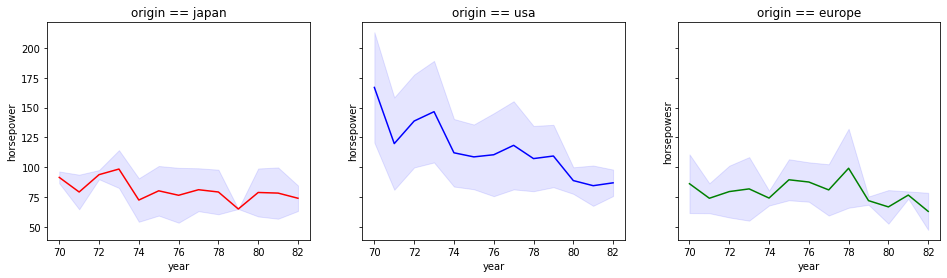

'\n알 수 있는 점 :\n미국의 표준편차가 크다...?\n'

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

data = pd.read_csv("mpg.csv", 
                      sep=",", 
                      dayfirst=True, 
                      infer_datetime_format=True)

is_japan = data["origin"] == "japan"
is_usa = data["origin"] == "usa"
is_europe = data["origin"] == "europe" 

f,axes = plt.subplots(1,3,sharey=True)

f.set_size_inches((16,4))

plt.title("year vs horsepower")

axes[0].plot(data["model_year"].drop_duplicates(), data[is_japan].groupby("model_year")["horsepower"].mean(),label="japan",color="red")
axes[0].fill_between(data["model_year"].drop_duplicates(), abs(data[is_japan].groupby("model_year")["horsepower"].mean()-data[is_japan].groupby("model_year")["horsepower"].std()), abs(data[is_japan].groupby("model_year")["horsepower"].mean()+data[is_japan].groupby("model_year")["horsepower"].std()),
                 facecolor="orange", 
                 color='blue',       
                 alpha=0.1)   
axes[0].set_xlabel('year')
axes[0].set_ylabel('horsepower')
axes[0].set_title("origin == japan")


axes[1].plot(data["model_year"].drop_duplicates(), data[is_usa].groupby("model_year")["horsepower"].mean(),label="usa",color="blue")
axes[1].fill_between(data["model_year"].drop_duplicates(), abs(data[is_usa].groupby("model_year")["horsepower"].mean()-data[is_usa].groupby("model_year")["horsepower"].std()), abs(data[is_usa].groupby("model_year")["horsepower"].mean()+data[is_usa].groupby("model_year")["horsepower"].std()),
                 facecolor="orange", 
                 color='blue',       
                 alpha=0.1)
axes[1].set_xlabel('year')
axes[1].set_ylabel('horsepower')
axes[1].set_title("origin == usa")

axes[2].plot(data["model_year"].drop_duplicates(), data[is_europe].groupby("model_year")["horsepower"].mean(),label="europe",color="green")

axes[2].fill_between(data["model_year"].drop_duplicates(), abs(data[is_europe].groupby("model_year")["horsepower"].mean()-data[is_europe].groupby("model_year")["horsepower"].std()), abs(data[is_europe].groupby("model_year")["horsepower"].mean()+data[is_europe].groupby("model_year")["horsepower"].std()),
                 facecolor="orange", 
                 color='blue',       
                 alpha=0.1)
axes[2].set_xlabel("year")
axes[2].set_ylabel('horsepowesr')
axes[2].set_title("origin == europe")


plt.show()


"""
알 수 있는 점 :
미국의 표준편차가 크다...?
"""



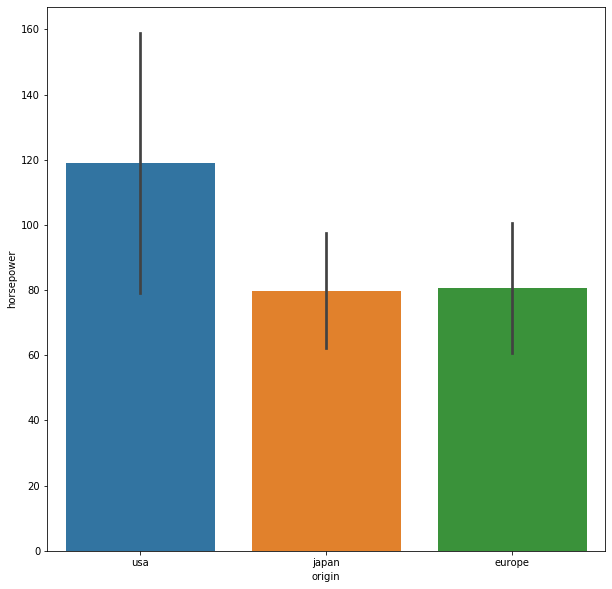

'\n알 수 있는 점 :\n흠,,\n'

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


data = pd.read_csv("mpg.csv", 
                      sep=",", 
                      dayfirst=True, 
                      infer_datetime_format=True)


sns.barplot(data=data,x="origin", y = "horsepower", ci="sd")
plt.show()


"""
알 수 있는 점 :
흠,,
"""



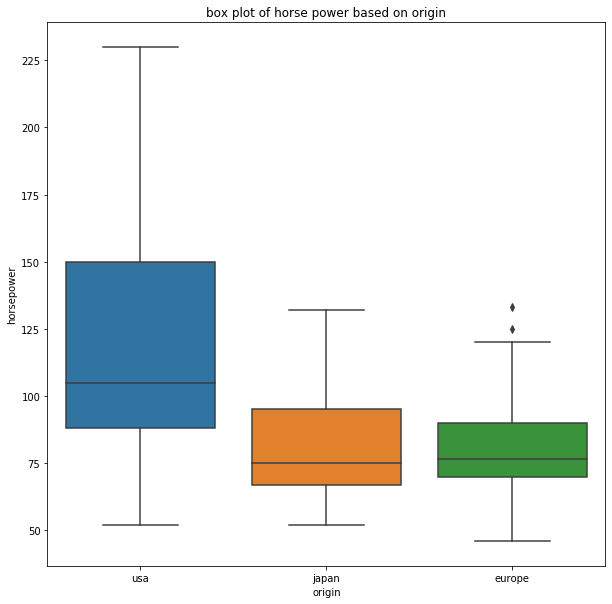

'\n1. 의미\n상자는 사분위의 범위\n각 상자의 가운데 선은 중앙값\n맨 끝의 선은 1분위, 3분위\n선 위의 다이아몬드는 이상치\n'

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


data = pd.read_csv("mpg.csv", 
                      sep=",", 
                      dayfirst=True, 
                      infer_datetime_format=True)


sns.boxplot(data=data,x="origin", y = "horsepower")
plt.title("box plot of horse power based on origin")
plt.show()


"""
1. 의미
상자는 사분위의 범위
각 상자의 가운데 선은 중앙값
맨 끝의 선은 1분위, 3분위
선 위의 다이아몬드는 이상치
"""



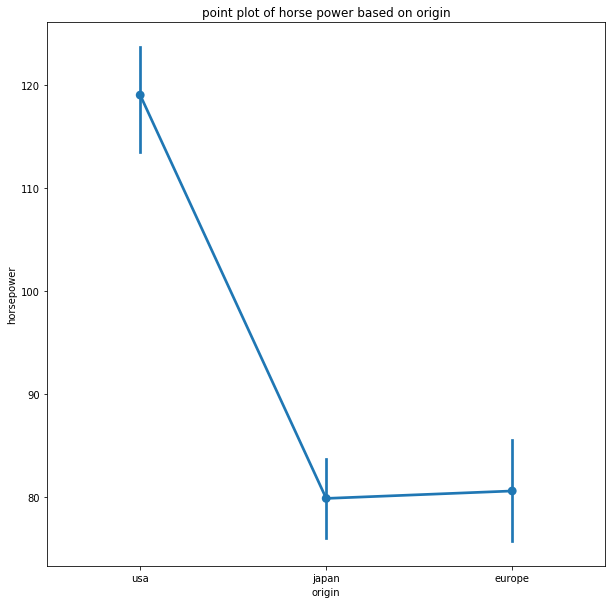

'\n1. 의미\n상자는 사분위의 범위\n각 상자의 가운데 선은 중앙값\n맨 끝의 선은 1분위, 3분위\n선 위의 다이아몬드는 이상치\n'

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


data = pd.read_csv("mpg.csv", 
                      sep=",", 
                      dayfirst=True, 
                      infer_datetime_format=True)


sns.pointplot(data=data,x="origin", y = "horsepower")
plt.title("point plot of horse power based on origin")
plt.show()



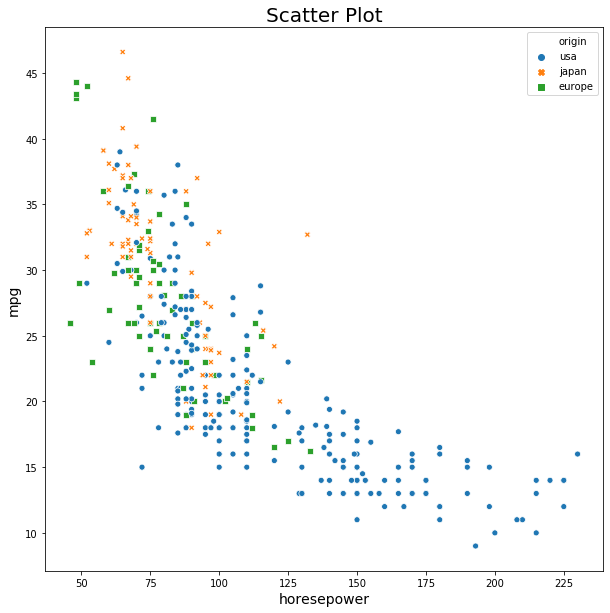

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


data1 = pd.read_csv("mpg.csv", 
                      sep=",",  )


sns.scatterplot(data = data1, x='horsepower', 
               y='mpg', 
            hue = "origin",
            style="origin",) 

plt.title('Scatter Plot', fontsize=20)
plt.xlabel('horesepower', fontsize=14)
plt.ylabel('mpg', fontsize=14)

plt.show()


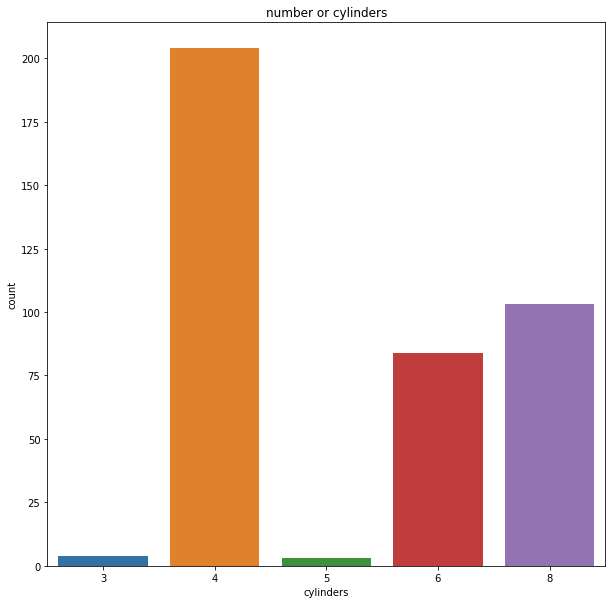

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


data1 = pd.read_csv("mpg.csv", 
                      sep=",",  )


sns.countplot(x='cylinders', data=data1)
plt.title("number or cylinders")
plt.show()

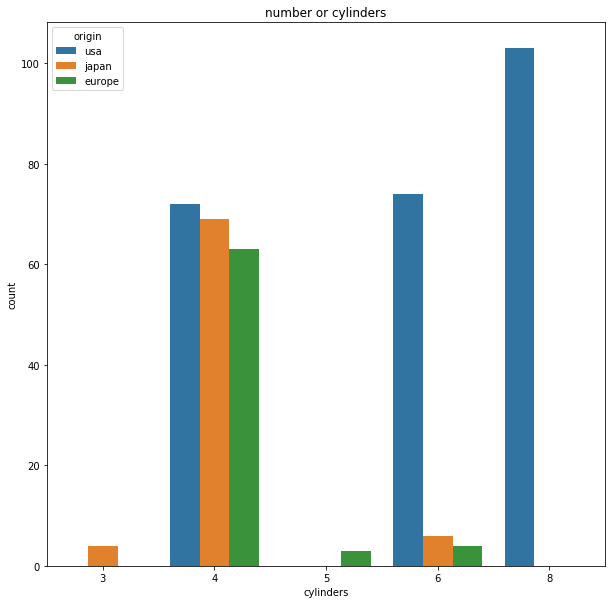

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


data1 = pd.read_csv("mpg.csv", 
                      sep=",",  )


sns.countplot(x='cylinders', data=data1,hue="origin")
plt.title("number or cylinders")
plt.show()

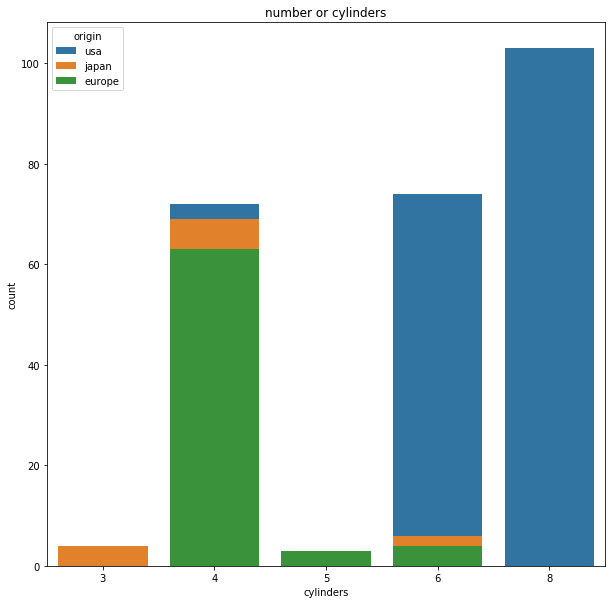

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


data1 = pd.read_csv("mpg.csv", 
                      sep=",")


sns.countplot(x='cylinders', data=data1,hue="origin",dodge=False)
plt.title("number or cylinders")
plt.show()

In [203]:
!pip install seaborn --upgrade

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


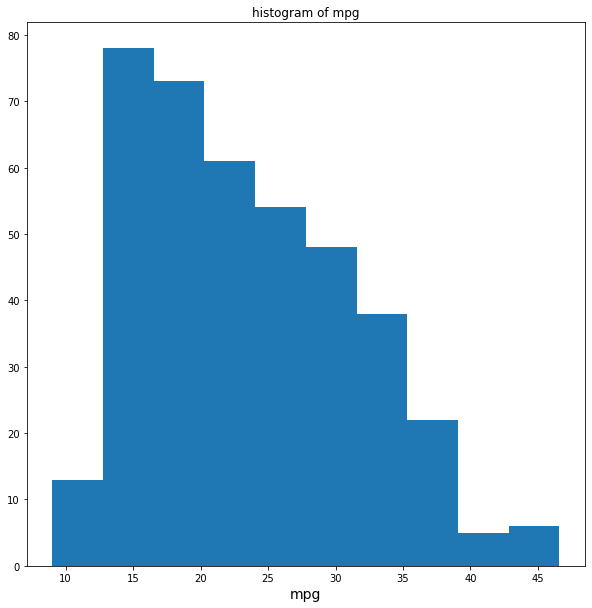

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


data1 = pd.read_csv("mpg.csv")

plt.hist(data1["mpg"])

plt.title("histogram of mpg")
plt.xlabel('mpg', fontsize=14)
plt.show()

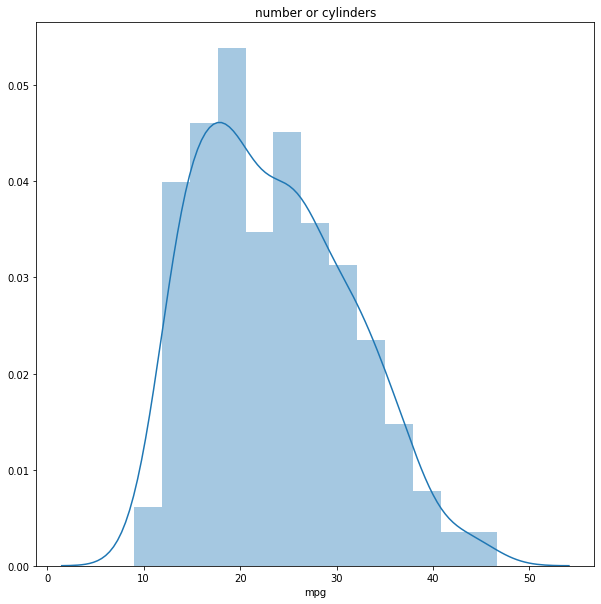

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


data1 = pd.read_csv("mpg.csv", 
                      sep=",")

sns.distplot(data1["mpg"])

plt.title("number or cylinders")
plt.show()

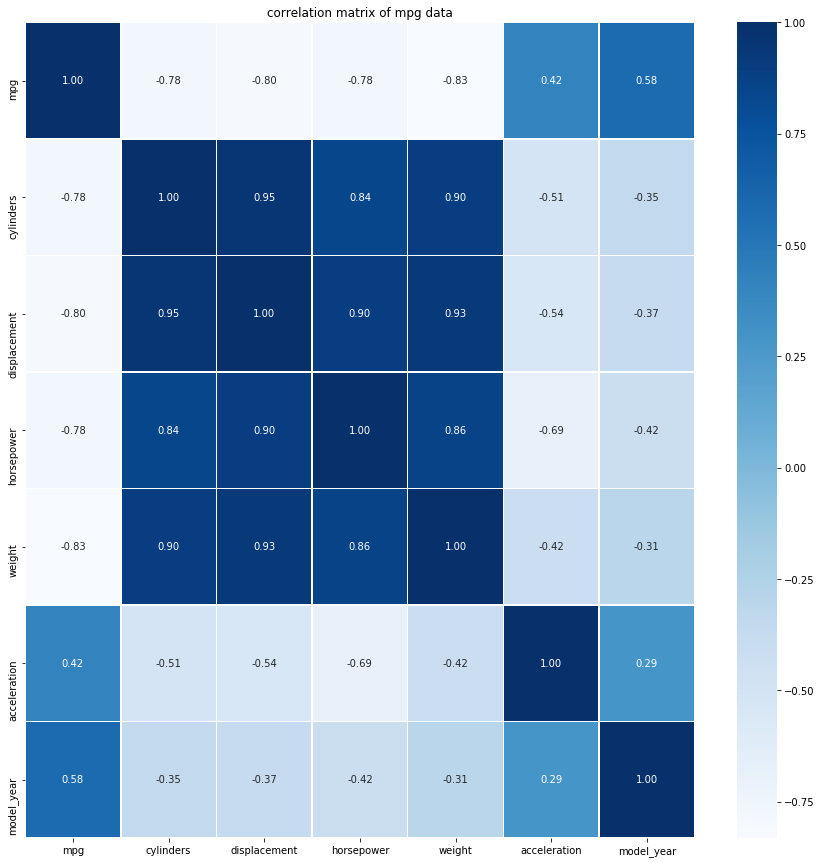

In [220]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime 
import seaborn as sns

data = pd.read_csv("mpg.csv", sep=",")

plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')


plt.title("correlation matrix of mpg data") 
plt.show()

<Figure size 1080x1080 with 0 Axes>

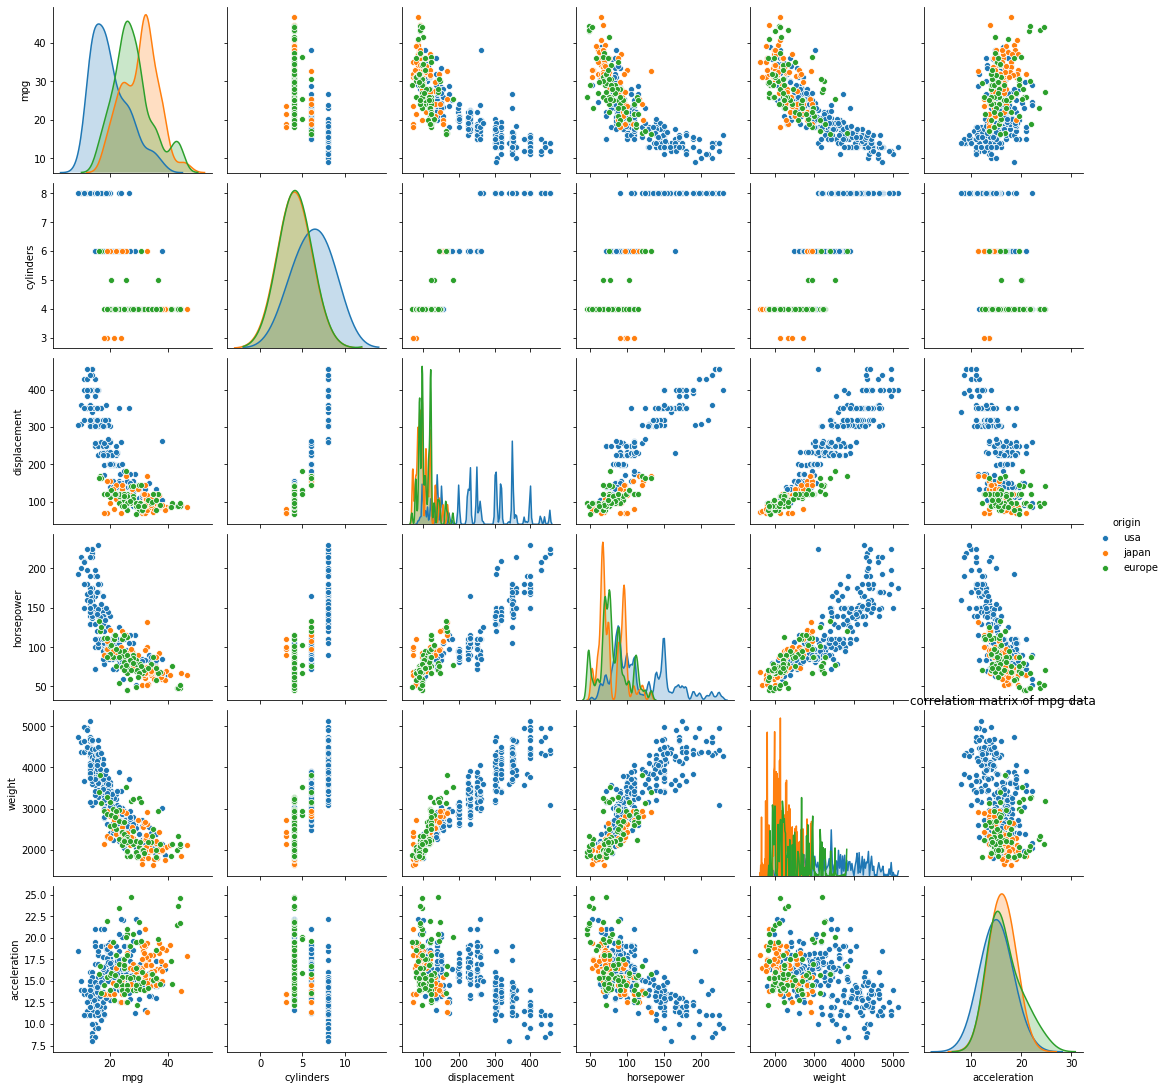

In [248]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime 
import seaborn as sns

data = pd.read_csv("mpg.csv", sep=",")
plt.figure(figsize=(15,15))
sns.pairplot(data,hue="origin",vars=["mpg","cylinders","displacement","horsepower","weight","acceleration"],diag_kws={'bw':2}, diag_kind = 'kde')

plt.title("correlation matrix of mpg data") 
plt.show()